Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Markus</p>| <p style="text-align: left">Frohmann</p> | k12005604 |
| <p style="text-align: left">Tobias</p>| <p style="text-align: left">Morocutti</p> | k12008172 |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2023)</h2><h1 style="text-align: center;color:rgb(0,120,170)">Assignment 1: Document Classification with LSTM and Transformers</h1>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-framework"><li style="font-size:large;font-weight:bold">Task A: PyTorch Framework for Document Classification (5 points)</li></a>
    <a href="#section-classification-rnn"><li style="font-size:large;font-weight:bold">Task B: Document Classification with LSTM (15 points)</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task C: Document Classification with Attention (15 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task D: Document Classification with Transformer (15 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task E: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
The aim of this assignment is to implement a document/sentence classification model with PyTorch, particularly by using Long Short-Term Memory (LSTM), Attention networks, and Transformers. The assignment has **50 points** in total.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments. Try to provide the solutions in a clear, and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the author(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python`, `PyTorch` and, `transformers`. Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f18654892601870996f2494cf3/48245/7814719893537218646/nlpwdl2023_data.zip).

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

In all experiments of this assignment, use any experiment monitoring tool like [`TensorBoard`](https://www.tensorflow.org/tensorboard), [`wandb`](https://wandb.ai) to log and store all useful information about the training and evaluation of the models. Feel free to log any important aspect in particular the changes in evaluation results on validation, in training loss, and in learning rate.

After finalizing all experiments and cleaning any unnecessary experiment, **provide the URL to the results monitoring page in the cell below**.

For instance if using [`TensorBoard.dev`](https://tensorboard.dev), you can run the following command in the folder of log files: `tensorboard dev upload --name my_exp --logdir path/to/output_dir`, and take the provided URL to the TensorBoard's console.

</div>


In [1]:
!pip install wandb

In [2]:
# !wandb login

In [3]:
import wandb

**URL :** *https://wandb.ai/tobiasm/NLPwDL*

<a name="section-classification-framework"></a><h2 style="color:rgb(0,120,170)">Task A: PyTorch Framework for Document Classification (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The formulation of this task is identical to the Assignment 3 of UE Natural Language Processing course. In this task, you implement a document classification model, which given a document/sentence, predicts the corresponding class. The PyTorch model in this task should be called **`ClassificationAverageModel`** in your code.

Given a document, first each word is mapped to its corresponding vector. Then, the word vectors are composed to create the embedding of the document using the *element-wise mean* of the word vectors. Formally, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

<center><div>$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$</div></center>

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document. This document embedding is finally used as features to predict the class (label) of the document. The implementation of the classification model should cover the following points.


    
**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.

**Overall functionality of the model (1 point)**

**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

</div>

In [4]:
wandb.init(project="NLPwDL", entity="tobiasm", name="average")

wandb: Currently logged in as: tobiasm. Use `wandb login --relogin` to force relogin


## Load data and Imports

**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

In [5]:
import pandas as pd
import numpy as np
import gensim

In [6]:
# Load the train, validation, and test sets
BASE_DIR = 'data/nlp2022_23_data/'
TRAIN_FILE = BASE_DIR + 'thedeep.subset' + '.train.txt'
VAL_FILE = BASE_DIR + 'thedeep.subset' + '.validation.txt'
TEST_FILE = BASE_DIR + 'thedeep.subset' + '.test.txt'
LABEL_FILE = BASE_DIR + 'thedeep.' + 'labels.txt'

train_df = pd.read_csv(TRAIN_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
val_df = pd.read_csv(VAL_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
test_df = pd.read_csv(TEST_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
label_df = pd.read_csv(LABEL_FILE, sep=',', header=None, names=['label', 'caption'])

## Pre-process

In [7]:
# print length of each set
print('Train set length: ', len(train_df))
print('Validation set length: ', len(val_df))
print('Test set length: ', len(test_df))

Train set length:  12110
Validation set length:  2596
Test set length:  2595


In [8]:
# print average length of text in each set
print('Average length of text in train set: ', np.round(np.mean(train_df['text'].str.len()), 2))
print('Average length of text in validation set: ', np.round(np.mean(val_df['text'].str.len()), 2))
print('Average length of text in test set: ', np.round(np.mean(test_df['text'].str.len()), 2))

Average length of text in train set:  450.86
Average length of text in validation set:  446.5
Average length of text in test set:  440.51


In [9]:
label_df

,label,caption
0,0,Agriculture
1,1,Cross
2,2,Education
3,3,Food
4,4,Health
5,5,Livelihood
6,6,Logistic
7,7,NFI
8,8,Nutrition
9,9,Protection


Each label corresponds to a given caption, i.e., a category.

In [10]:
def map_label_to_caption(label):
    """
    Map label id to caption using label_df
    :param label: label id, int
    :return: label caption, str
    """
    return label_df[label_df['label'] == label]['caption'].values[0]

In [11]:
train_df = train_df.assign(caption=train_df['label'].apply(map_label_to_caption))
val_df = val_df.assign(caption=val_df['label'].apply(map_label_to_caption))
test_df = test_df.assign(caption=test_df['label'].apply(map_label_to_caption))

### Clean text

In [12]:
import re

# remove punctuation marks, replace dates & numbers, apply case-sensitivity
# do this in order to reduce the size of the dictionary & reduce complexity
def clean_text(text):
    """
    Clean text by replacing dates & numbers, applying case-sensitivity
    :param text: text to clean, str
    :return: cleaned text, str
    """
    # remove punctuation marks
    # text = re.sub(r'[^\w\s]', '', text)
    # replace dates
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '< date >', text)
    # replace numbers
    text = re.sub(r'\d+', '< num >', text)
    # apply case-sensitivity
    text = text.lower()
    return text

In [13]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [14]:
train_df

,sentence_id,text,label,caption,cleaned_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod..."
...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...


### Tokenization

In [15]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/tobi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tobi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/tobi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# use NLTK tokenizer (TreebankWordTokenizer)
from nltk.tokenize import word_tokenize
train_df['tokenized_text'] = train_df['cleaned_text'].apply(word_tokenize)
val_df['tokenized_text'] = val_df['cleaned_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(word_tokenize)

## Stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tobi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# remove stopwords in English in order to reduce the size of the dictionary
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['tokenized_text'] = train_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
val_df['tokenized_text'] = val_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['tokenized_text'] = test_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [19]:
# create dictionary using train set
def create_dictionary(tokenized_text):
    """
    Create dictionary using train set
    :param tokenized_text: tokenized text, list
    :return: dictionary, dict
    """
    dictionary = {}
    for tokens in tokenized_text:
        for token in tokens:
            if token not in dictionary:
                dictionary[token] = 1
            else:
                dictionary[token] += 1
    return dictionary

In [20]:
dictionary = create_dictionary(train_df['tokenized_text'])

In [21]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  31195


In [22]:
# keep only top-N most frequent words
# removing any word with a lower frequency than a threshold
# OOV (out-of-vocabulary) words will be replaced with the <oov> token
def clean_dictionary(dictionary, N: int, threshold: int):
    """
    Clean dictionary by keeping only top-N most frequent words and removing any word with a lower frequency than a threshold
    :param dictionary: dictionary, dict
    :param N: top-N most frequent words, int
    :param threshold: threshold of word frequency, int
    :return: cleaned dictionary, dict
    """
    # keep only top-N most frequent words
    dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:N])

    # replace any word with a lower frequency than a threshold
    for key, value in dictionary.copy().items():
        if value < threshold:
            dictionary['<oov>'] = dictionary.get('<oov>', 0) + value
            dictionary.pop(key)
    return dictionary

In [23]:
dictionary = clean_dictionary(dictionary, N=100_000, threshold=5)

In [24]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  8234


In [25]:
list(dictionary.items())[:10]

[(',', 51067),
 ('<', 50593),
 ('>', 50580),
 ('num', 50536),
 ('.', 35837),
 (')', 9820),
 ('(', 9808),
 ('cases', 4755),
 ('food', 4133),
 ('%', 4025)]

Since we do not longer care about the frequency of each word, we can replace the frequency counts with the word index

In [26]:
# map each word to an index
dictionary = {word: index for index, word in enumerate(dictionary.keys())}

# Data Batching
**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

In [27]:
config = {}
config['BATCH_SIZE'] = 32
config['MAX_DOCUMENT_LENGTH'] = 100

In [28]:
def create_x_batches(df, dictionary, batch_size: int, max_document_length: int):
    """
    Create batches for any given dataset (train/validation/test) - X
    :param df: dataframe, pd.DataFrame
    :param dictionary: dictionary, dict
    :param batch_size: batch size, int
    :param max_document_length: max document length, int
    :return: batches of inputs, list of np.ndarray of shape (batch_size, max_document_length)
    """
    n_batches = len(df) // batch_size + 1
    print("Number of batches: ", n_batches)
    batches = []
    for batch_idx in range(n_batches):
        if batch_idx != n_batches - 1:
            # standard batch
            batch = np.zeros((batch_size, max_document_length), dtype=np.int32)
        else:
            # last batch - may be smaller than batch_size
            batch = np.zeros((len(df) - batch_idx * batch_size, max_document_length), dtype=np.int32)
        current_batch_size = batch.shape[0]
        for doc_idx in range(current_batch_size):
            doc = df.iloc[batch_idx * batch_size + doc_idx]['tokenized_text']
            for word_idx in range(min(len(doc), max_document_length)):
                word = doc[word_idx]
                batch[doc_idx, word_idx] = dictionary.get(word, dictionary['<oov>'])
        batches.append(batch)


    return batches

In [29]:
def create_y_batches(df, batch_size: int):
    """
    Create batches for any given dataset (train/validation/test) - y
    :param df: dataframe, pd.DataFrame
    :param batch_size: batch size, int
    :return: batches of labels, np.ndarray of shape (n_batches, batch_size)
    """
    n_batches = len(df) // batch_size + 1
    print("Number of batches: ", n_batches)
    batches = []
    for batch_idx in range(n_batches):
        if batch_idx != n_batches - 1:
            batch = np.zeros((batch_size), dtype=np.int32)
        else:
            batch = np.zeros((len(df) - batch_idx * batch_size), dtype=np.int32)
        current_batch_size = batch.shape[0]
        for doc_idx in range(current_batch_size):
            batch[doc_idx] = df.iloc[batch_idx * batch_size + doc_idx]['label']
        batches.append(batch)
    return batches

In [30]:
train_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...,"[addition, immediate, life-saving, interventio..."
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...,"[approximately, <, num, >, ., <, num, >, milli..."
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme...","[aid, imports, held, recently, ,, commercial, ..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...,"[heavy, rainfalls, well, onrush, water, upstre..."
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod...","[based, field, reports, <, num, >, ,, main, pr..."
...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan..."
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...,"[food, crisis, looming, country, season, ’, ma..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...,"[?, acute, watery, diarrhoea, (, awd, ), conti..."
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...,"[south, india, grapples, drought, water, short..."


In [31]:
batches = {}
for name, df in zip(['train', 'val', 'test'], [train_df, val_df, test_df]):
    batches[name] = {}
    batches[name]['x'] = create_x_batches(df, dictionary, config['BATCH_SIZE'], config['MAX_DOCUMENT_LENGTH'])
    batches[name]['y'] = create_y_batches(df, config['BATCH_SIZE'])


Number of batches:  379
Number of batches:  379
Number of batches:  82
Number of batches:  82
Number of batches:  82
Number of batches:  82


In [32]:
len(batches['train']['x'])

379

In [33]:
len(batches['train']['y'])

379

In [34]:
batches["train"]['x'][0].shape

(32, 100)

In [35]:
batches["train"]['y'][0].shape

(32,)

In [36]:
batches["train"]['x'][-1].shape

(14, 100)

In [37]:
batches["train"]['y'][-1].shape

(14,)

In [38]:
batches["train"]['x'][0]

array([[ 297,  719, 1335, ...,    0,    0,    0],
       [ 287,    1,    3, ...,  371,    4,  732],
       [ 188,  629,  532, ...,    0,    0,    0],
       ...,
       [  18,  540,   23, ...,    0,    0,    0],
       [1709,  125,  114, ...,    0,    0,    0],
       [ 104,    1,    3, ...,    0,    0,    0]], dtype=int32)

In [39]:
batches["train"]['y'][0]

array([ 9,  3,  5,  0,  3,  9,  9,  1,  4,  4,  9,  3,  8,  9,  4,  9,  9,
        3,  9,  2,  1, 10,  3,  5,  3,  4,  3,  9,  3, 11,  7, 10],
      dtype=int32)

In [40]:
batches["train"]['x'][-1]

array([[ 231,  126,    1, ...,    0,    0,    0],
       [ 271,   70, 3519, ...,    5,  319, 1737],
       [ 206,    1,    3, ...,    1,    3,    2],
       ...,
       [  72,   60,  726, ...,    0,    0,    0],
       [  55, 2010, 8233, ...,    0,    0,    0],
       [8233,  985,   55, ...,    0,    0,    0]], dtype=int32)

In [41]:
batches["train"]['y'][-1]

array([ 4, 11,  4,  3,  3,  4,  9,  8,  4,  8,  0,  4, 11,  3],
      dtype=int32)

## Load pre-trained word embeddings

In [42]:
# use gensim to load the word embedding model (GloVe)

# Download the GloVe model from https://nlp.stanford.edu/projects/glove/
# and unzip it in the /data

In [43]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d data

--2023-05-30 14:22:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-30 14:22:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-30 14:22:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [44]:
import gensim.scripts.glove2word2vec as glove2word2vec
glove_model = glove2word2vec.glove2word2vec('data/glove.6B.300d.txt', 'data/glove.6B.300d.word2vec.txt')

/home/tobi/anaconda3/envs/malach/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  


In [45]:
# load the GloVe model
glove_model = gensim.models.KeyedVectors.load_word2vec_format('data/glove.6B.300d.word2vec.txt', binary=False)

## Create word embedding lookup

In [46]:
import torch
from torch import nn
import torch.nn.functional as F

In [47]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
config['device'] = device
device = torch.device(device)

In [48]:
list(dictionary.items())[:10]

[(',', 0),
 ('<', 1),
 ('>', 2),
 ('num', 3),
 ('.', 4),
 (')', 5),
 ('(', 6),
 ('cases', 7),
 ('food', 8),
 ('%', 9)]

In [49]:
class WordEmbeddingLookup(nn.Module):
    """
    Create word embedding lookup
    """
    def __init__(self, dictionary, pretrained_embeddings, embedding_dim: int):
        """
        :param dictionary: dictionary, dict
        :param pretrained_embeddings: pretrained embeddings, gensim.models.keyedvectors.Word2VecKeyedVectors
        :param embedding_dim: embedding dimension, int
        """
        super(WordEmbeddingLookup, self).__init__()
        self.dictionary = dictionary
        self.pretrained_embeddings = pretrained_embeddings
        self.embedding_dim = embedding_dim
        self.lookup = nn.Embedding(
            num_embeddings=len(dictionary),
            embedding_dim=embedding_dim
        )
        self.lookup.weight.data.copy_(self._init_weights())

    def _init_weights(self):
        """
        Initialize weights of the lookup
        :return: weights, torch.Tensor of shape (len(dictionary), embedding_dim)
        """
        weights = torch.zeros(len(self.dictionary), self.embedding_dim)
        # 8247 x 300
        for idx, word in enumerate(self.dictionary):
            try:
                weights[idx] = torch.from_numpy(self.pretrained_embeddings[word])
            except KeyError:
                weights[idx] = torch.randn(self.embedding_dim)
        return weights

    def forward(self, x):
        """
        Forward pass
        :param x: input, torch.Tensor of shape (batch_size, max_document_length)
        :return: output, torch.Tensor of shape (batch_size, max_document_length, embedding_dim)
        """
        return self.lookup(x)

In [50]:
lookup = WordEmbeddingLookup(dictionary, glove_model, 300)

/home/tobi/anaconda3/envs/malach/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)


In [51]:
lookup(torch.LongTensor([0])).shape

torch.Size([1, 300])

In [52]:
lookup(torch.LongTensor([0]))

tensor([[-2.5539e-01, -2.5723e-01,  1.3169e-01, -4.2688e-02,  2.1817e-01,
         -2.2702e-02, -1.7854e-01,  1.0756e-01,  5.8936e-02, -1.3854e+00,
          5.8509e-01,  3.6501e-02, -1.9846e-01,  1.9613e-01,  4.0929e-01,
          1.5702e-01, -1.5305e-01,  5.0447e-02,  3.0045e-01, -1.1295e-01,
         -1.7043e-02,  1.8593e-01,  1.9982e-01,  2.0053e-01, -6.3141e-01,
         -1.2622e-01,  2.9510e-01, -2.6282e-01, -1.5831e-01,  1.2383e-03,
          1.1784e-02,  5.8758e-01, -1.5914e-01,  2.7731e-01, -8.2343e-01,
         -2.1134e-01,  1.3414e-02,  1.9637e-01, -4.1470e-01,  1.0276e-03,
          1.3422e-01, -1.4205e-01,  5.1545e-02,  3.4993e-01, -2.9868e-01,
         -3.2090e-01,  1.9566e-01,  4.7886e-01,  1.0744e-01,  1.0004e-02,
          1.8503e-01,  8.0694e-02,  2.0739e-01, -9.7365e-02, -3.9448e-02,
          2.0151e-02, -1.7378e-01,  2.5679e-01,  2.4198e-01, -3.5100e-01,
          1.8759e-01,  6.3857e-03,  1.8395e-01, -1.3929e-01,  8.1855e-03,
         -6.3109e-01,  2.9832e-01,  3.

In [53]:
lookup(torch.LongTensor([0, 1, 3, 4, 5])).shape

torch.Size([5, 300])

In [54]:
lookup(torch.LongTensor([0, 1, 3, 4, 5]))

tensor([[-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550],
        [ 0.0781,  0.1256,  0.4092,  ..., -0.5402,  0.0186,  0.1694],
        [-0.2471,  0.1417,  0.3834,  ...,  0.1208, -0.0695,  0.2728],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        [-0.1388, -0.2495, -0.1390,  ..., -0.5921,  0.3364, -0.3376]],
       grad_fn=<EmbeddingBackward0>)

In [55]:
lookup(torch.LongTensor(batches['train']['x'][0])).shape

torch.Size([32, 100, 300])

In [56]:
lookup(torch.LongTensor(batches['train']['x'][0]))

tensor([[[-0.3065,  0.1035,  0.1314,  ..., -0.2260, -0.1216, -0.1998],
         [ 0.2865, -0.1274,  0.2993,  ...,  0.0082, -0.1743,  0.0679],
         [-0.0869, -0.2978,  0.5271,  ..., -0.1748,  0.3437, -0.3702],
         ...,
         [-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550],
         [-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550],
         [-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550]],

        [[-0.8402,  0.1228, -0.0439,  ...,  0.3091,  0.2616, -0.6601],
         [ 0.0781,  0.1256,  0.4092,  ..., -0.5402,  0.0186,  0.1694],
         [-0.2471,  0.1417,  0.3834,  ...,  0.1208, -0.0695,  0.2728],
         ...,
         [ 0.1376,  0.8267, -0.0110,  ...,  0.0446,  0.0998, -0.6314],
         [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
         [ 0.0354, -0.0639,  0.0024,  ..., -0.3730, -0.1845,  0.1761]],

        [[-0.0900, -0.7406, -0.1571,  ...,  0.1088, -0.3891,  0.1672],
         [ 0.4358,  0.2319, -0.2250,  ..., -0

In [57]:
lookup(torch.LongTensor(batches['train']['x'][-1])).shape

torch.Size([14, 100, 300])

In [58]:
lookup(torch.LongTensor(batches['train']['x'][-1]))

tensor([[[-3.8775e-01,  4.1099e-01, -2.0687e-02,  ..., -5.0146e-01,
           3.2521e-01, -5.7759e-01],
         [-8.5832e-01, -3.4205e-01,  1.3168e+00,  ..., -1.0156e+00,
          -1.0798e+00,  3.8542e-01],
         [ 7.8119e-02,  1.2563e-01,  4.0916e-01,  ..., -5.4024e-01,
           1.8594e-02,  1.6943e-01],
         ...,
         [-2.5539e-01, -2.5723e-01,  1.3169e-01,  ..., -2.3290e-01,
          -1.2226e-01,  3.5499e-01],
         [-2.5539e-01, -2.5723e-01,  1.3169e-01,  ..., -2.3290e-01,
          -1.2226e-01,  3.5499e-01],
         [-2.5539e-01, -2.5723e-01,  1.3169e-01,  ..., -2.3290e-01,
          -1.2226e-01,  3.5499e-01]],

        [[-2.2436e-01,  3.2679e-01,  1.8346e-02,  ..., -2.0585e-01,
          -4.1200e-01, -3.4145e-01],
         [-3.7763e-01,  5.0981e-01, -4.4110e-01,  ..., -6.0567e-01,
          -4.4908e-01, -1.4731e-01],
         [-5.7449e-02,  8.0789e-02, -1.1824e-01,  ..., -1.1858e-03,
           2.1189e-01, -2.9694e-01],
         ...,
         [-1.3877e-01, -2

In [59]:
class ClassificationAverageModel(nn.Module):
    """
    Classification model
    """
    def __init__(self, lookup, num_classes: int):
        """
        Initialize the model - include the lookup as model's parameters
        :param lookup: word embedding lookup, WordEmbeddingLookup
        :param num_classes: number of classes, int
        """
        super(ClassificationAverageModel, self).__init__()
        self.lookup = lookup
        self.num_classes = num_classes
        self.linear = nn.Linear(300, num_classes)


    def forward(self, x):
        """
        Forward pass - get lookup of x, calculate the mean of the embeddings of the words in the document,
        and apply a linear transformation to the embeddings size to the number of classes followed by Softmax
        :param x: input, torch.Tensor of shape (batch_size, max_document_length)
        :return: output, torch.Tensor of shape (batch_size, num_classes)
        """

        # get the embeddings of the word IDs in the batch using the lookup
        x = self.lookup(x)
        
        # calculate the *element-wise mean* of the embeddings of the document's words
        x = torch.mean(x, dim=1)
        
        # apply a linear transformation from the embeddings size to the number of classes, followed by Softmax
        x = self.linear(x)
        x = F.softmax(x, dim=1)
        return x


# Loss Function and optimization
**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.


In [60]:
model = ClassificationAverageModel(lookup.to(device), np.unique(train_df["label"]).shape[0]).to(device)

In [61]:
from torch import optim

config['LOSS'] = "nll"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [62]:
config['LR'] = 1e-3
config['optim_fn'] = "adam"

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [63]:
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

def do_train(model, criterion, optimizer, batches, epochs: int = 20, patience: int = 3, model_arch='', device='cpu'):
    """
    Train the model for a number of epochs
    :param model: model to train, ClassificationAverageModel
    :param criterion: loss function, nn.CrossEntropyLoss
    :param optimizer: optimization method, optim.Adam
    :param batches: batches of data, list of (np.array, np.array)
    :param epochs: number of epochs, int
    :param patience: number of epochs to wait before early stopping, int
    :return: best model, ClassificationAverageModel
    """
    best_model = None
    best_acc = 0.0
    best_epoch = 0
    X_train = batches["train"]["x"]
    y_train = batches["train"]["y"]
    X_val = batches["val"]["x"]
    y_val = batches["val"]["y"]
    patience_counter = 0
    loss = torch.tensor(0.0)

    print("Start training!")
    print("=" * len("Start training!"))
    print(f"Optimizer: {config['optim_fn']}, Loss: {config['LOSS']}, LR: {config['LR']}")
    print(f"Epochs: {epochs}, Patience: {patience}")
    print("=" * len(f"Epochs: {epochs}, Patience: {patience}"))
    print()

    # LOOP OVER EPOCHS
    for epoch in tqdm(range(1, epochs + 1), desc="Epochs", total=epochs):
        print(f"Epoch: {epoch}")
        model.train()
        # lists of all predictions and labels to calculate accuracy
        y_pred_all = []
        y_true_all = []
        losses = []
        for x, y in tqdm(zip(X_train, y_train), desc="Training", total=len(X_train)):
            optimizer.zero_grad()

            x = torch.LongTensor(x).to(device)
            y_true = torch.LongTensor(y).to(device)

            y_pred = model(x)
            loss = criterion(y_pred, y_true)
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
            # to calculate accuracy
            y_pred_all.append(torch.argmax(y_pred, dim=1).tolist())
            y_true_all.append(y_true.tolist())
        y_pred_all = np.concatenate(y_pred_all)
        y_true_all = np.concatenate(y_true_all)
        acc = accuracy_score(y_true_all, y_pred_all)
        print(f"Train accuracy: {acc}, Train loss: {np.mean(losses)}")

        # VALIDATION
        model.eval()
        val_losses = []
        
        # lists of all predictions and labels to calculate accuracy
        y_pred_all = []
        y_true_all = []
        for x, y in zip(X_val, y_val):
            x = torch.LongTensor(x).to(device)
            y_pred = model(x)
            y_true = torch.LongTensor(y).to(device)
            
            with torch.no_grad(): 
                val_loss = criterion(y_pred, y_true)
                val_losses.append(val_loss.item())
            
            y_pred_all.append(torch.argmax(y_pred, dim=1).tolist())
            y_true_all.append(y_true.tolist())
        y_pred_all = np.concatenate(y_pred_all)
        y_true_all = np.concatenate(y_true_all)
        val_acc = accuracy_score(y_true_all, y_pred_all)
        print(f"Validation Accuracy: {val_acc}")
        
        wandb.log({
            "train_loss": np.mean(losses), 
            "train_acc": acc, 
            "epoch": epoch,
            "val_loss": np.mean(val_losses),
            "val_acc": val_acc
        })

        # EARLY STOPPING
        if val_acc > best_acc:
            best_acc = val_acc
            best_epoch = epoch
            torch.save(model, f"best_model_{config['MODEL_ARCH']}.pt")
            best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)
            print("Best model updated")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter == patience:
                print(f"Early stopping after {epoch} epochs")
                break

    print("Training finished")
    print("Best validation accuracy: ", best_acc)
    print("Best epoch: ", best_epoch)
    return best_model

In [64]:
config['N_EPOCHS'] = 20
config['PATIENCE'] = 3
config['DO_TRAIN'] = True
config['MODEL_ARCH'] = 'average'

wandb.config = config

In [65]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: nll, LR: 0.001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.37654830718414534, Train loss: -0.3129104417908475
Validation Accuracy: 0.4776579352850539
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.543682906688687, Train loss: -0.4822834723071247
Validation Accuracy: 0.5631741140215717
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5797687861271676, Train loss: -0.5371934946105474
Validation Accuracy: 0.5805084745762712
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5922378199834847, Train loss: -0.5613452632540449
Validation Accuracy: 0.5878274268104776
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5991742361684558, Train loss: -0.5752700537364527
Validation Accuracy: 0.5897534668721109
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6020644095788604, Train loss: -0.5843620359268541
Validation Accuracy: 0.5924499229583975
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6061932287365813, Train loss: -0.5910021581718978
Validation Accuracy: 0.5936055469953775
Best model updated
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.609496284062758, Train loss: -0.5966827555665241
Validation Accuracy: 0.600924499229584
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6328654004954583, Train loss: -0.6137329099360745
Validation Accuracy: 0.6205701078582434
Best model updated
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6563996696944674, Train loss: -0.6318908134047777
Validation Accuracy: 0.6298151001540832
Best model updated
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6673823286540049, Train loss: -0.6455107539656294
Validation Accuracy: 0.6336671802773498
Best model updated
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6738232865400495, Train loss: -0.6548803660989122
Validation Accuracy: 0.6363636363636364
Best model updated
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6781172584640792, Train loss: -0.6615454517599775
Validation Accuracy: 0.6371340523882897
Best model updated
Epoch: 14


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6857968620974402, Train loss: -0.669863170715624
Validation Accuracy: 0.652542372881356
Best model updated
Epoch: 15


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7079273327828242, Train loss: -0.6872179824318294
Validation Accuracy: 0.674884437596302
Best model updated
Epoch: 16


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7189099917423617, Train loss: -0.6997301814424016
Validation Accuracy: 0.6810477657935285
Best model updated
Epoch: 17


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7369942196531792, Train loss: -0.7150141695873089
Validation Accuracy: 0.7064714946070878
Best model updated
Epoch: 18


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7668042939719241, Train loss: -0.7392225070490371
Validation Accuracy: 0.7334360554699538
Best model updated
Epoch: 19


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7926507018992568, Train loss: -0.7628923077382009
Validation Accuracy: 0.7503852080123267
Best model updated
Epoch: 20


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8052023121387283, Train loss: -0.7792527408272736
Validation Accuracy: 0.75231124807396
Best model updated
Training finished
Best validation accuracy:  0.75231124807396
Best epoch:  20


In [66]:
def predict(model, input_to_predict, device='cpu'):
    """
    Predict the classes of the test set
    :param model: trained model, Classifica*tionAverageModel
    :param input: test set, list of np.array
    :return: predicted classes, torch.Tensor of shape (batch_size, num_classes)
    """
    model.eval()
    y_pred_all = []
    for x in input_to_predict:

        x = torch.LongTensor(x).to(device)
        y_pred = model(x)
        y_pred_all.append(torch.argmax(y_pred, dim=1).tolist())
    return np.concatenate(y_pred_all)

In [67]:
y_pred_test = predict(best_model, batches["test"]["x"], device=device)

In [68]:
assert y_pred_test.shape == (test_df.shape[0],)

In [69]:
acc_test = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test})
acc_test

0.7533718689788054

# Reporting
**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

Sufficient information and examples are provided throughout the notebook.

In [70]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)

In [71]:
acc_val = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val})
acc_val

0.75231124807396

In [72]:
print(f"Validation accuracy: {acc_val}")
print(f"Test accuracy: {acc_test}")

Validation accuracy: 0.75231124807396
Test accuracy: 0.7533718689788054


In [73]:
report = pd.DataFrame(
    {
        "Validation Accuracy": [acc_val],
        "Test Accuracy": [acc_test],
    }
)
report

,Validation Accuracy,Test Accuracy
0,0.752311,0.753372


In [74]:
wandb.finish()

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
final_val_acc,▁
test_acc,▁
train_acc,▁▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇██
train_loss,█▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁
val_acc,▁▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▇███
val_loss,█▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▁▁
epoch,20
final_val_acc,0.75231
test_acc,0.75337
train_acc,0.8052


<a name="section-classification-rnn"></a><h2 style="color:rgb(0,120,170)">Task B: Classification with LSTM (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

This task implements a document classification model with PyTorch using Long Short-Term Memory (LSTM). This model should be called **`ClassificationRNNModel`** in your code, which contains all various variants as explained later. The schematic architecture of `ClassificationRNNModel` is shown in the figure below. `ClassificationRNNModel` extends `ClassificationAverageModel` by an LSTM layer. 

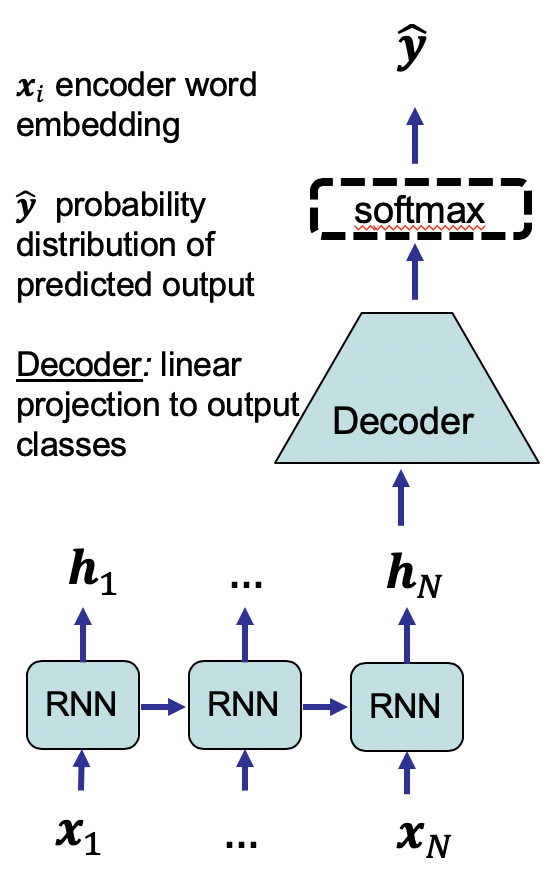

The implementation of `ClassificationRNNModel` covers the following points:

**Baseline model (5 points):** The baseline LSTM model first fetches the corresponding embeddings of the word IDs of a given batch. It then calculates hidden states of the given sequences (documents) with the LSTM model. Finally, the **last hidden state** of LSTM is used as document embedding to predict the probability distribution of the output classes by the decoder (a linear projection) and a softmax layer. A dropout layer is applied to the output of the LSTM.

**Model variations (3 points):** Implement the **three variations** of the baseline LSTM model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationRNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Word Embeddings & RNN (1 point).** Select (at least) one of these proposed cases:
  - Freeze the weights of encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 
  - Increase/decrease the dimension of the hidden state of the RNN.
  - Use GRU instead of LSTM.

- **Variation 2 - Regularization & Optimization (1 point).** Select (at least) one of these proposed cases:
  - Increase/decrease drop out rates and tune the model accordingly.
  - Add L2 weight regularization to the loss function.
  - Use SGD instead of Adam.

- **Variation 3 - Document Embedding (1 point).** Select (at least) one of these proposed cases:
  - Use a Bidirectional LSTM, and set the document embedding as the concatenation of the last state of forward LSTM with the last state of backward LSTM.
  - Calculate the mean of all the intermediary hidden states as the final document embedding.

**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

</div>

In [75]:
class ClassificationRNNModel(ClassificationAverageModel):
    """
    Classification model with LSTM
    """
    def __init__(
            self,
            lookup,
            num_classes: int,
            freeze_embeddings=False, # variation 1.1
            random_embeddings=False, # variation 1.2
            hidden_size=128, # variation 1.3
            bidirectional=False, # variation 3.1
            dropout=0.5, # variation 2.1
            calculate_mean=False, # variation 3.2
            rnn_type="LSTM", # variation 1.4
            l2_regularization=0.0,
            optim_fn='Adam'
            ):
        """
        Initialize the model
        :param freeze_embeddings: Whether to freeze the embeddings or not
        :param random_embeddings: Whether to initialize the embeddings randomly or not
        :param hidden_size: Hidden size of the LSTM
        :param bidirectional: Whether to use a bidirectional LSTM or not
        :param dropout: Dropout rate
        :param calculate_mean: Whether to calculate the mean of the hidden states or not
        """
        super().__init__(lookup, num_classes)
        self.freeze_embeddings = freeze_embeddings
        self.random_embeddings = random_embeddings
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.calculate_mean = calculate_mean
        self.embedding_dim = lookup.embedding_dim
        self.rnn_type = rnn_type
        
        self.l2_regularization = l2_regularization
        self.optim_fn = optim_fn

        self.rnn = None
        self.decoder = None
        self._build_model()

    def _build_model(self):
        """
        Build the model
        :return: None
        """
        # Embeddings
        if self.random_embeddings:
            self.lookup = nn.Embedding.from_pretrained(
                torch.randn(self.vocab_size, self.embedding_dim)
            )
        if self.freeze_embeddings:
            self.lookup.lookup.weight.requires_grad = False
            
        # RNN
        if self.rnn_type == "LSTM":
            self.rnn = nn.LSTM(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                num_layers=1,
                batch_first=True,
                bidirectional=self.bidirectional
            )
            
        elif self.rnn_type == "GRU":
            self.rnn = nn.GRU(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                num_layers=1,
                batch_first=True,
                bidirectional=self.bidirectional
            )
            
        # Decoder
        self.decoder = nn.Sequential(
            nn.Dropout(self.dropout),
            nn.Linear(self.hidden_size*(2 if self.bidirectional else 1), self.num_classes),
        )

    def forward(self, x):
        """
        Forward pass
        :param x: input batch
        :return: output logits
        """
        
        # Embeddings
        x = self.lookup(x)
        
        # RNN
        x, _ = self.rnn(x)
        
        # Document embedding
        if self.bidirectional:
            x = torch.cat((x[:, -1, :self.hidden_size], x[:, 0, self.hidden_size:]), dim=1)
        elif self.calculate_mean:
            x = torch.mean(x, dim=1)
        else:
            x = x[:, -1, :]
            
        # Decoder
        x = self.decoder(x)
        return x

In [76]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()
    
config['N_EPOCHS'] = 20
config['PATIENCE'] = 3
config['DO_TRAIN'] = True
config['LR'] = 1e-4

## Baseline

Baseline using LSTM and adjusted learning rate

In [77]:
config['MODEL_ARCH'] = 'RNN_baseline'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [78]:
model = ClassificationRNNModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    rnn_type='LSTM',
).to(device)

In [79]:
config['optim_fn'] = model.optim_fn
config["l2_regularization"] = model.l2_regularization 

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
    
wandb.config = config

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)
    

Start training!
Optimizer: Adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.2500412881915772, Train loss: 2.1828663000016224
Validation Accuracy: 0.2684899845916795
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.4429397192402973, Train loss: 1.7871742437256988
Validation Accuracy: 0.5793528505392912
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5966969446738233, Train loss: 1.4797612464836845
Validation Accuracy: 0.5832049306625577
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5926507018992568, Train loss: 1.4723316721991688
Validation Accuracy: 0.5597072419106317
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.597440132122213, Train loss: 1.455205614774397
Validation Accuracy: 0.5685670261941448
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5660611065235343, Train loss: 1.5469469339992252
Validation Accuracy: 0.5808936825885979
Early stopping after 6 epochs
Training finished
Best validation accuracy:  0.5832049306625577
Best epoch:  3


In [80]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_baseline = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_baseline})
print("Validation accuracy: ", acc_val_baseline)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_baseline = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_baseline})
print("Test accuracy: ", acc_test_baseline)

Validation accuracy:  0.5832049306625577
Test accuracy:  0.5888246628131021


In [81]:
wandb.finish()

epoch,▁▂▄▅▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▅███▇
train_loss,█▄▁▁▁▂
val_acc,▁██▇██
val_loss,█▂▁▁▁▁
epoch,6
final_val_acc,0.5832
test_acc,0.58882
train_acc,0.56606


## Variation 1

Using a GRU network instead of a LSTM network. 

In [82]:
config['MODEL_ARCH'] = 'RNN_variation_1'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [83]:
model = ClassificationRNNModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    rnn_type='GRU'
).to(device)

In [84]:
config['optim_fn'] = model.optim_fn
config["l2_regularization"] = model.l2_regularization 

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
    
wandb.config = config

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)
    
print('='*20)
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_one = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_one})
print("Validation accuracy: ", acc_val_one)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_one = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_one})
print("Test accuracy: ", acc_test_one)

Start training!
Optimizer: Adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.24888521882741535, Train loss: 2.171022319542072
Validation Accuracy: 0.2642526964560863
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3933113129644922, Train loss: 1.8765027172332702
Validation Accuracy: 0.5755007704160247
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6264244426094137, Train loss: 1.2843889466690828
Validation Accuracy: 0.6140215716486903
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6667217175887696, Train loss: 1.1236103919376483
Validation Accuracy: 0.6190292758089369
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6836498761354253, Train loss: 1.0573197181746954
Validation Accuracy: 0.6429121725731896
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7056977704376548, Train loss: 0.9925440123653664
Validation Accuracy: 0.6687211093990755
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7323699421965318, Train loss: 0.9323264257417191
Validation Accuracy: 0.6802773497688752
Best model updated
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7526011560693642, Train loss: 0.867618209689777
Validation Accuracy: 0.6949152542372882
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7753922378199835, Train loss: 0.8005070639159875
Validation Accuracy: 0.727657935285054
Best model updated
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.801981833195706, Train loss: 0.7334407501925264
Validation Accuracy: 0.7457627118644068
Best model updated
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8213047068538398, Train loss: 0.6699102450172002
Validation Accuracy: 0.7457627118644068
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.835177539223782, Train loss: 0.6221450470525546
Validation Accuracy: 0.7449922958397535
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8440132122213047, Train loss: 0.5798314499194515
Validation Accuracy: 0.7457627118644068
Early stopping after 13 epochs
Training finished
Best validation accuracy:  0.7457627118644068
Best epoch:  10
Validation accuracy:  0.7457627118644068
Test accuracy:  0.751830443159923


In [85]:
wandb.finish()

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▃▅▆▆▆▇▇▇████
train_loss,█▇▄▃▃▃▃▂▂▂▁▁▁
val_acc,▁▆▆▆▇▇▇▇█████
val_loss,█▄▃▃▃▂▂▂▁▁▁▁▁
epoch,13
final_val_acc,0.74576
test_acc,0.75183
train_acc,0.84401


## Variation 2

LSTM network with a SGD optimizer instead of an Adam optimizer.

In [86]:
config['MODEL_ARCH'] = 'RNN_variation_2'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [87]:
model = ClassificationRNNModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    rnn_type='LSTM',
    optim_fn='SGD'
).to(device)

In [88]:
config['optim_fn'] = model.optim_fn
config["l2_regularization"] = model.l2_regularization 

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
    
wandb.config = config

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)
    
print('='*20)
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_two = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_two})
print("Validation accuracy: ", acc_val_two)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_two = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_two})
print("Test accuracy: ", acc_test_two)

Start training!
Optimizer: SGD, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.2507018992568126, Train loss: 2.170991580215796
Validation Accuracy: 0.2731124807395994
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.42840627580511975, Train loss: 1.8143921357660622
Validation Accuracy: 0.4911402157164869
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5890999174236169, Train loss: 1.525705616832723
Validation Accuracy: 0.5747303543913713
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5303055326176713, Train loss: 1.6359361230855252
Validation Accuracy: 0.47226502311248075
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5554087530966144, Train loss: 1.555708166005429
Validation Accuracy: 0.5743451463790447
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6007431874483897, Train loss: 1.4177405592004981
Validation Accuracy: 0.5812788906009245
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5897605284888522, Train loss: 1.4060130094160819
Validation Accuracy: 0.5716486902927581
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6218827415359207, Train loss: 1.2793438772727443
Validation Accuracy: 0.5989984591679507
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6085879438480595, Train loss: 1.3116207533272715
Validation Accuracy: 0.5570107858243452
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6208092485549133, Train loss: 1.3067210131081552
Validation Accuracy: 0.6043913713405239
Best model updated
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6682080924855491, Train loss: 1.1844513875513405
Validation Accuracy: 0.6205701078582434
Best model updated
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6669694467382329, Train loss: 1.1769416297645872
Validation Accuracy: 0.6232665639445301
Best model updated
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7010734929810074, Train loss: 1.0815563953646254
Validation Accuracy: 0.6448382126348228
Best model updated
Epoch: 14


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7165152766308835, Train loss: 1.0234978821000826
Validation Accuracy: 0.6683359013867488
Best model updated
Epoch: 15


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7366639141205615, Train loss: 0.9864576699551303
Validation Accuracy: 0.6560092449922958
Epoch: 16


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7158546655656483, Train loss: 1.0086584540187211
Validation Accuracy: 0.6787365177195686
Best model updated
Epoch: 17


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7511147811725847, Train loss: 0.9241809764763925
Validation Accuracy: 0.7057010785824345
Best model updated
Epoch: 18


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7540875309661437, Train loss: 0.9337788319367532
Validation Accuracy: 0.7122496147919877
Best model updated
Epoch: 19


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7762180016515277, Train loss: 0.8970087494573367
Validation Accuracy: 0.710708782742681
Epoch: 20


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7511147811725847, Train loss: 0.9187243039029255
Validation Accuracy: 0.7114791987673343
Training finished
Best validation accuracy:  0.7122496147919877
Best epoch:  18
Validation accuracy:  0.7122496147919877
Test accuracy:  0.7140655105973025


In [89]:
wandb.finish()

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
final_val_acc,▁
test_acc,▁
train_acc,▁▃▆▅▅▆▆▆▆▆▇▇▇▇▇▇████
train_loss,█▆▄▅▅▄▄▃▃▃▃▃▂▂▁▂▁▁▁▁
val_acc,▁▄▆▄▆▆▆▆▆▆▇▇▇▇▇▇████
val_loss,█▅▄▅▄▃▃▃▄▂▂▂▂▂▂▁▁▂▁▁
epoch,20
final_val_acc,0.71225
test_acc,0.71407
train_acc,0.75111


## Variation 3

Using a bidirectional LSTM network.

In [90]:
config['MODEL_ARCH'] = 'RNN_variation_3'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [91]:
model = ClassificationRNNModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    rnn_type='LSTM',
    bidirectional=True
).to(device)

In [92]:
config['optim_fn'] = model.optim_fn
config["l2_regularization"] = model.l2_regularization 

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
    
wandb.config = config

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)
    
    
print('='*20)
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_three = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_three})
print("Validation accuracy: ", acc_val_three)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_three = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_three})
print("Test accuracy: ", acc_test_three)

Start training!
Optimizer: Adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5463253509496284, Train loss: 1.6235540787588638
Validation Accuracy: 0.652542372881356
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7518579686209744, Train loss: 1.0014653135887237
Validation Accuracy: 0.7272727272727273
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8072667217175887, Train loss: 0.7931680858607028
Validation Accuracy: 0.7492295839753467
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8205615194054501, Train loss: 0.6951004715739579
Validation Accuracy: 0.7565485362095532
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8284888521882742, Train loss: 0.6446286051443195
Validation Accuracy: 0.7580893682588598
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8337737407101569, Train loss: 0.6111294351183959
Validation Accuracy: 0.7619414483821263
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8409578860445912, Train loss: 0.5807574491623524
Validation Accuracy: 0.7669491525423728
Best model updated
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8496284062758052, Train loss: 0.5526517060312558
Validation Accuracy: 0.7600154083204931
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8516928158546656, Train loss: 0.5318149102158786
Validation Accuracy: 0.7673343605546995
Best model updated
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8601156069364162, Train loss: 0.5039549993257724
Validation Accuracy: 0.765793528505393
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8650701899256813, Train loss: 0.48966807549657165
Validation Accuracy: 0.773497688751926
Best model updated
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8701899256812552, Train loss: 0.4657483465753319
Validation Accuracy: 0.7677195685670262
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8763831544178365, Train loss: 0.44918380754368287
Validation Accuracy: 0.7700308166409862
Epoch: 14


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8811725846407927, Train loss: 0.43522463986615706
Validation Accuracy: 0.773497688751926
Early stopping after 14 epochs
Training finished
Best validation accuracy:  0.773497688751926
Best epoch:  11
Validation accuracy:  0.773497688751926
Test accuracy:  0.7695568400770713


In [93]:
wandb.finish()

epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▅▆▇▇▇▇▇▇█████
train_loss,█▄▃▃▂▂▂▂▂▁▁▁▁▁
val_acc,▁▅▇▇▇▇█▇██████
val_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁
epoch,14
final_val_acc,0.7735
test_acc,0.76956
train_acc,0.88117


## **Reporting and discussion (2 points)** 

Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

In [94]:
report = pd.DataFrame(
    {
        "Run": ['Baseline', 'Variation 1', 'Variation 2', 'Variation 3'],
        "Description": ['Baseline with LSTM', 'GRU instead of LSTM', 'SGD optimizer instead of Adam', 'bidirectional LSTM'],
        "Validation Accuracy": [acc_val_baseline, acc_val_one, acc_val_two, acc_val_three],
        "Test Accuracy": [acc_test_baseline, acc_test_one, acc_test_two, acc_test_three],
    }
)
report

,Run,Description,Validation Accuracy,Test Accuracy
0,Baseline,Baseline with LSTM,0.583205,0.588825
1,Variation 1,GRU instead of LSTM,0.745763,0.751830
2,Variation 2,SGD optimizer instead of Adam,0.712250,0.714066
3,Variation 3,bidirectional LSTM,0.773498,0.769557


In [95]:
report_df = pd.DataFrame({})
report_df['Run'] = pd.concat([report['Run'], report['Run']])
report_df['Description'] = pd.concat([report['Description'], report['Description']])
report_df['acc'] = pd.concat([report['Validation Accuracy'], report['Test Accuracy']])
report_df['set'] = ['val'] * 4 + ['test'] * 4

In [96]:
import seaborn as sns

(0.4, 0.85)

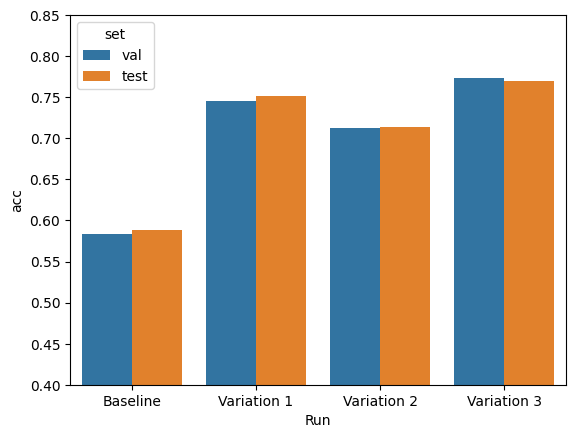

In [97]:
sns.barplot(report_df, x='Run', y='acc', hue='set').set_ylim(0.4, 0.85)

The third variation, using a bidirectional LSTM network seems to be most effective. 
Since our experiments are not deterministic, results of the same experiments can differ heavily. 
In an optimal situation, we would analyze the performance of different experiments over a few runs (per experiment) and we would implement a learning rate scheduler with decreasing learning rate at the end.

To sum up, there is a clear performance increase when we use a bidirectional LSTM network and the other experiments perform very similar. Depending on the i

<a name="section-classification-attention"></a><h2 style="color:rgb(0,120,170)">Task C: Document Classification with Attention (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

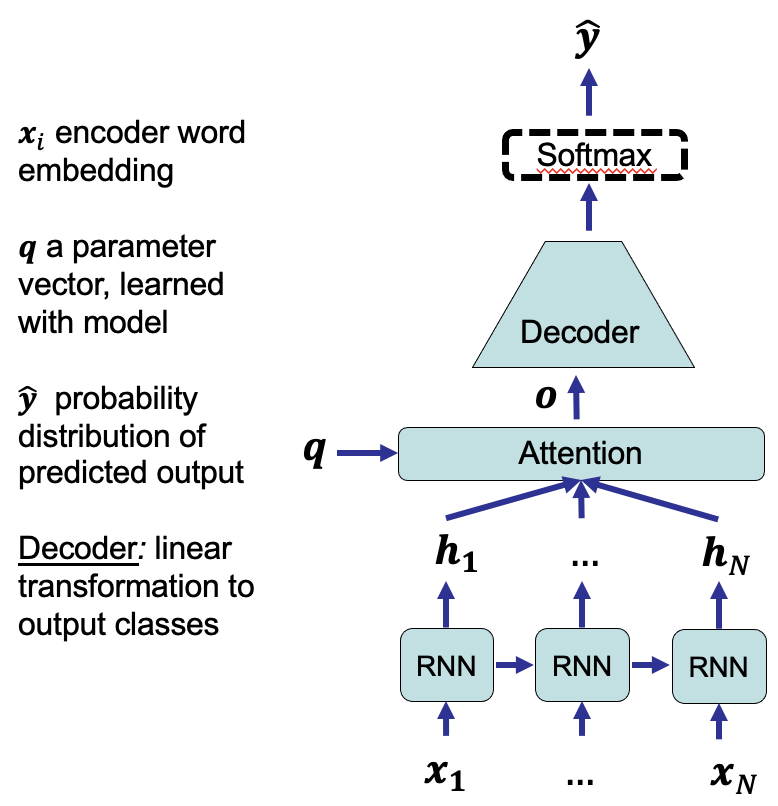

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** This Attention layer should be implemented by you from scratch without using any specific library/class. Here, you implement the baseline Attention layer following the formulation of the (single-head) **basic dot-product Attention**. In this model, Query vector is defined in the model's initialization as *a vector of learnable parameters*, whose values are learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is correctly setting the padding masks, which mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that the baseline model is working correctly is that the final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Another attention variation (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

In [98]:
class DotProductAttention(nn.Module):
    def __init__(self, hidden_size):
        """
        Calculate the attention weights using the dot-product of the query and keys.
        :param hidden_size: the size of the hidden state
        """
        super(DotProductAttention, self).__init__()
        self.query = nn.Parameter(torch.randn(hidden_size))

    def forward(self, values, keys, mask=None):
        """
        :param values: (batch_size, seq_len, hidden_size)
        :param keys: (batch_size, seq_len, hidden_size)
        :param mask: (batch_size, seq_len)
        :return: attention: (batch_size, hidden_size)
                 attention_weights: (batch_size, seq_len)
        """
        # Calculate the attention weights
        attention_weights = torch.matmul(keys, self.query)
        attention_weights = attention_weights / math.sqrt(self.query.size(0))
        
        # Mask the attention weights
        if mask is not None:
            attention_weights = attention_weights.masked_fill(mask == 0, -1e9)
            
        # Softmax
        attention_weights = F.softmax(attention_weights, dim=1)
        
        # Calculate the attention
        attention = torch.matmul(attention_weights.unsqueeze(1), values).squeeze(1)
        return attention, attention_weights

    
class AdditiveAttention(nn.Module):
    def __init__(self, hidden_size):
        """
        Calculate the attention weights using the additive-product of the query and keys.
        :param hidden_size: the size of the hidden state
        """
        super(AdditiveAttention, self).__init__()
        self.query = nn.Parameter(torch.randn(hidden_size, 1))
        self.W = torch.nn.Linear(hidden_size*2, hidden_size)
        
        # initialization
        nn.init.normal_(self.query, 0, 0.1)
        
    def forward(self, values, keys, mask=None):
        """
        :param values: (batch_size, seq_len, hidden_size)
        :param keys: (batch_size, seq_len, hidden_size)
        :param mask: (batch_size, seq_len)
        :return: attention: (batch_size, hidden_size)
                 attention_weights: (batch_size, seq_len)
        """
        
        B, T, H = keys.size()
        
        # compute energy 
        feats = torch.cat((values, keys), dim=2)
        feats = feats.permute(1, 0, 2)  # 100 x 32 x 512
        energy = torch.tanh(self.W(feats))  # 100 x 32 x 256
        
        # compute attention scores
        query = self.query.t().repeat(B, 1, 1)
        energy = energy.permute(1, 2, 0)  # 32 x 256 x 100
        
        scores = torch.bmm(query, energy)
        
        # apply mask, renormalize
        if mask is not None: 
            scores = scores * mask
        
        scores.div_(scores.sum(2, keepdim=True))
        
        combo = torch.bmm(scores, keys).squeeze(1)
        
        return (combo, scores)
    
        
class ClassificationAttentionModel(ClassificationAverageModel):
    def __init__(
            self,
            lookup,
            num_classes,
            freeze_embeddings=False,
            random_embeddings=False,
            hidden_size=128,
            bidirectional=True,
            dropout=0.5,
            attention_type="dot",
            rnn_type="LSTM",
            no_rnn=False,
    ):
        """
        Initialize the model
        :param freeze_embeddings: Whether to freeze the embeddings or not
        :param random_embeddings: Whether to initialize the embeddings randomly or not
        :param hidden_size: Hidden size of the LSTM
        :param bidirectional: Whether to use a bidirectional LSTM or not
        :param dropout: Dropout rate
        :param attention_type: Type of attention to use
        :param rnn_type: Type of RNN to use
        """
        super().__init__(lookup, num_classes)
        self.freeze_embeddings = freeze_embeddings
        self.random_embeddings = random_embeddings
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding_dim = lookup.embedding_dim
        self.attention_type = attention_type
        self.rnn_type = rnn_type
        self.no_rnn = no_rnn

        self.rnn = None
        self.attention = None
        self.decoder = None
        self._build_model()

    def _build_model(self):
        """
        Build the model
        :return: None
        """
        # Embeddings
        if self.random_embeddings:
            self.lookup = nn.Embedding.from_pretrained(
                torch.randn(self.vocab_size, self.embedding_dim)
            )
        if self.freeze_embeddings:
            self.lookup.weight.requires_grad = False
        # RNN
        if self.no_rnn:
            self.rnn = None
        else:
            if self.rnn_type == "LSTM":
                self.rnn = nn.LSTM(
                    input_size=self.embedding_dim,
                    hidden_size=self.hidden_size,
                    num_layers=1,
                    batch_first=True,
                    bidirectional=self.bidirectional
                )
            elif self.rnn_type == "GRU":
                self.rnn = nn.GRU(
                    input_size=self.embedding_dim,
                    hidden_size=self.hidden_size,
                    num_layers=1,
                    batch_first=True,
                    bidirectional=self.bidirectional
                )
        # Attention
        attention = None
        if self.attention_type == 'dot': 
            if self.no_rnn:
                self.attention = DotProductAttention(self.embedding_dim)
            else:
                self.attention = DotProductAttention(self.hidden_size * 2 if self.bidirectional else self.hidden_size)
        elif self.attention_type == 'add': 
            if self.no_rnn:
                self.attention = AdditiveAttention(self.embedding_dim)
            else:
                self.attention = AdditiveAttention(self.hidden_size * 2 if self.bidirectional else self.hidden_size)
            

        # Decoder
        if self.no_rnn:
            self.decoder = nn.Linear(self.embedding_dim, self.num_classes)
        else:
            self.decoder = nn.Linear(self.hidden_size * 2 if self.bidirectional else self.hidden_size, self.num_classes)

        # Dropout
        self.dropout = nn.Dropout(self.dropout)

    def forward(self, x):
        """
        Forward pass
        :param x: Input
        :return: Output
        """
        # Embeddings
        x = self.lookup(x)
        
        # RNN
        if self.no_rnn:
            x = x
        elif self.rnn_type == "LSTM":
            x, _ = self.rnn(x)
        elif self.rnn_type == "GRU":
            x, _ = self.rnn(x)
            
        # Attention
        x, _ = self.attention(x, x)
        
        # Decoder
        x = self.decoder(x)
        return x

## Baseline model

In [99]:
config['MODEL_ARCH'] = 'attention_baseline'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [100]:
model = ClassificationAttentionModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    attention_type="dot",
).to(device)

In [101]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [102]:
config['LR'] = 1e-4
config['optim_fn'] = "adam"

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [103]:
config['N_EPOCHS'] = 20
config['PATIENCE'] = 3
config['DO_TRAIN'] = True

wandb.config = config

In [104]:
import math

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6625928984310487, Train loss: 1.312353300780923
Validation Accuracy: 0.7553929121725732
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8203137902559868, Train loss: 0.6520741636174335
Validation Accuracy: 0.7692604006163328
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8402972749793559, Train loss: 0.5642870753059915
Validation Accuracy: 0.7754237288135594
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8556564822460776, Train loss: 0.5137823109261908
Validation Accuracy: 0.7788906009244992
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8684558216350123, Train loss: 0.47437879655480697
Validation Accuracy: 0.7835130970724191
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8802642444260942, Train loss: 0.44183929423779483
Validation Accuracy: 0.7838983050847458
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8882741535920726, Train loss: 0.4128262230187733
Validation Accuracy: 0.786979969183359
Best model updated
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8958711808422791, Train loss: 0.38783545308503126
Validation Accuracy: 0.7873651771956857
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.9028075970272502, Train loss: 0.36443957352229345
Validation Accuracy: 0.7927580893682589
Best model updated
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.9087530966143683, Train loss: 0.344635235838651
Validation Accuracy: 0.7946841294298922
Best model updated
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.9143682906688687, Train loss: 0.3243303959869772
Validation Accuracy: 0.7873651771956857
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.9199009083402147, Train loss: 0.30703367483568694
Validation Accuracy: 0.7900616332819723
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.9264244426094137, Train loss: 0.28456092817527007
Validation Accuracy: 0.7900616332819723
Early stopping after 13 epochs
Training finished
Best validation accuracy:  0.7946841294298922
Best epoch:  10


In [105]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_baseline = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_baseline})
print("Validation accuracy: ", acc_val_baseline)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_baseline = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_baseline})
print("Test accuracy: ", acc_test_baseline)

Validation accuracy:  0.7946841294298922
Test accuracy:  0.8011560693641618


In [106]:
wandb.finish()

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▅▆▆▆▇▇▇▇████
train_loss,█▄▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▃▅▅▆▆▇▇██▇▇▇
val_loss,█▄▃▂▂▂▁▂▁▂▂▂▂
epoch,13
final_val_acc,0.79468
test_acc,0.80116
train_acc,0.92642


## Model variations
**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Another attention variation (1 point).** Implement another type of single-head Attention other than basic dot-product.

### No RNN

In [107]:
config['MODEL_ARCH'] = 'attention_no_RNN'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [108]:
model = ClassificationAttentionModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    no_rnn=True,
    attention_type="dot",
).to(device)

if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.4295623451692816, Train loss: 1.9403359981199682
Validation Accuracy: 0.5119414483821263
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6024772914946326, Train loss: 1.4953943376176275
Validation Accuracy: 0.6610169491525424
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.719157720891825, Train loss: 1.0891956331547459
Validation Accuracy: 0.7315100154083205
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7672171758876961, Train loss: 0.8573037522763879
Validation Accuracy: 0.7611710323574731
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7895953757225433, Train loss: 0.7504971437057908
Validation Accuracy: 0.7650231124807396
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7997522708505368, Train loss: 0.6970584754657619
Validation Accuracy: 0.7785053929121726
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8090834021469859, Train loss: 0.6620532106362421
Validation Accuracy: 0.785824345146379
Best model updated
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8180842279108175, Train loss: 0.6336644438923507
Validation Accuracy: 0.7908320493066255
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8273327828241123, Train loss: 0.6084382849742995
Validation Accuracy: 0.7939137134052389
Best model updated
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8360858794384806, Train loss: 0.5852763184928642
Validation Accuracy: 0.8012326656394453
Best model updated
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8418662262592899, Train loss: 0.5639775110737945
Validation Accuracy: 0.8054699537750385
Best model updated
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.848802642444261, Train loss: 0.5446501527581177
Validation Accuracy: 0.8043143297380585
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8533443435177539, Train loss: 0.5272754339162152
Validation Accuracy: 0.8039291217257319
Epoch: 14


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8585466556564822, Train loss: 0.5115800321023508
Validation Accuracy: 0.8058551617873652
Best model updated
Epoch: 15


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8620974401321222, Train loss: 0.49719392366726983
Validation Accuracy: 0.8062403697996918
Best model updated
Epoch: 16


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8653179190751445, Train loss: 0.48380108154071666
Validation Accuracy: 0.809322033898305
Best model updated
Epoch: 17


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8705202312138728, Train loss: 0.4711779396499367
Validation Accuracy: 0.811633281972265
Best model updated
Epoch: 18


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8735755573905863, Train loss: 0.45917671081415895
Validation Accuracy: 0.8124036979969184
Best model updated
Epoch: 19


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8764657308009909, Train loss: 0.44770160993674185
Validation Accuracy: 0.8124036979969184
Epoch: 20


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8790255986787778, Train loss: 0.4366909918574356
Validation Accuracy: 0.8131741140215717
Best model updated
Training finished
Best validation accuracy:  0.8131741140215717
Best epoch:  20


In [109]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_no_rnn = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_no_rnn})
print("Validation accuracy: ", acc_val_no_rnn)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_no_rnn = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_no_rnn})
print("Test accuracy: ", acc_test_no_rnn)

Validation accuracy:  0.8131741140215717
Test accuracy:  0.8131021194605009


In [110]:
config['MODEL_ARCH']

'attention_no_RNN'

In [111]:
wandb.finish()

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
final_val_acc,▁
test_acc,▁
train_acc,▁▄▆▆▇▇▇▇▇▇▇█████████
train_loss,█▆▄▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▄▆▇▇▇▇▇████████████
val_loss,█▅▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch,20
final_val_acc,0.81317
test_acc,0.8131
train_acc,0.87903


### Additive Attention

In [112]:
config['MODEL_ARCH'] = 'attention_additive'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [113]:
model = ClassificationAttentionModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    attention_type="add",
).to(device)

if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3490503715937242, Train loss: 2.187383341600524
Validation Accuracy: 0.423728813559322
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5022295623451692, Train loss: 1.7445408256827684
Validation Accuracy: 0.4872881355932203
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5388934764657308, Train loss: 1.5933982761365442
Validation Accuracy: 0.5285053929121726
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5872832369942197, Train loss: 1.4825135191071945
Validation Accuracy: 0.573959938366718
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6132947976878613, Train loss: 1.2883180153401357
Validation Accuracy: 0.5920647149460708
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6626754748142032, Train loss: 1.148245692410381
Validation Accuracy: 0.634437596302003
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7161849710982658, Train loss: 1.0198669686795538
Validation Accuracy: 0.6818181818181818
Best model updated
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7672997522708506, Train loss: 0.8810249609494272
Validation Accuracy: 0.7134052388289677
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5510322047894303, Train loss: 1.8018182980039188
Validation Accuracy: 0.36941448382126346
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5373245251857969, Train loss: 1.6811333973363711
Validation Accuracy: 0.538135593220339
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5836498761354253, Train loss: 1.600104258368701
Validation Accuracy: 0.5539291217257319
Early stopping after 11 epochs
Training finished
Best validation accuracy:  0.7134052388289677
Best epoch:  8


In [114]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_additive = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_additive})
print("Validation accuracy: ", acc_val_additive)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_additive = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_additive})
print("Test accuracy: ", acc_test_additive)

Validation accuracy:  0.7134052388289677
Test accuracy:  0.7163776493256262


In [115]:
wandb.finish()

epoch,▁▂▂▃▄▅▅▆▇▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▄▄▅▅▆▇█▄▄▅
train_loss,█▆▅▄▃▂▂▁▆▅▅
val_acc,▂▃▄▅▆▆▇█▁▄▅
val_loss,█▆▅▄▃▂▂▁▇▆▅
epoch,11
final_val_acc,0.71341
test_acc,0.71638
train_acc,0.58365


## Reporting and discussion
**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

In [116]:
report = pd.DataFrame(
    {
        "Run": ['Baseline', 'No RNN', 'Additive Attention'],
        "Description": ['Baseline with RNN', 'Network without RNN', 'Network using Additive Attention instead of Dot-Product Attention'],
        "Validation Accuracy": [acc_val_baseline, acc_val_no_rnn, acc_val_additive],
        "Test Accuracy": [acc_test_baseline, acc_test_no_rnn, acc_test_additive],
    }
)
report

,Run,Description,Validation Accuracy,Test Accuracy
0,Baseline,Baseline with RNN,0.794684,0.801156
1,No RNN,Network without RNN,0.813174,0.813102
2,Additive Attention,Network using Additive Attention instead of Do...,0.713405,0.716378


In [117]:
report_df = pd.DataFrame({})
report_df['Run'] = pd.concat([report['Run'], report['Run']])
report_df['Description'] = pd.concat([report['Description'], report['Description']])
report_df['acc'] = pd.concat([report['Validation Accuracy'], report['Test Accuracy']])
report_df['set'] = ['val'] * 3 + ['test'] * 3

(0.6, 0.85)

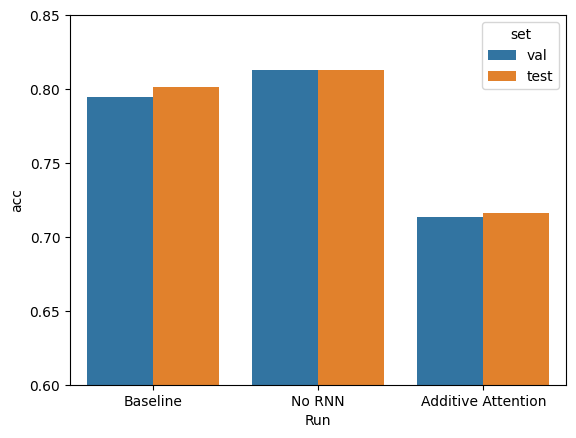

In [118]:
sns.barplot(report_df, x='Run', y='acc', hue='set').set_ylim(0.6, 0.85)

The variant without the RNN actually performs best on the validation and test set. Additive attention works worse than dot-product attention.

<a name="section-classification-transformer"></a><h2 style="color:rgb(0,120,170)">Task D: Document Classification with Transformer (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.
</div>

In [119]:
wandb.init(project="NLPwDL", entity="tobiasm", name="Transformer")

In [120]:
lookup.embedding_dim, np.unique(train_df["label"]).shape[0]

(300, 12)

In [121]:
class ClassificationTransformerModel(ClassificationAverageModel):
    def __init__(
            self,
            lookup,
            num_classes,
            freeze_embeddings=False,
            random_embeddings=False,
            hidden_size=128,
            bidirectional=True,
            dropout=0.5,
            attention_type="dot",
            rnn_type="LSTM",
            use_transformer_encoder=False,
            n_heads=1,
            n_layers=1,
    ):
        super().__init__(lookup, num_classes)
        self.freeze_embeddings = freeze_embeddings
        self.random_embeddings = random_embeddings
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding_dim = lookup.embedding_dim
        self.attention_type = attention_type
        self.rnn_type = rnn_type
        self.use_transformer_encoder = use_transformer_encoder
        self.n_heads = n_heads
        self.n_layers = n_layers

        self.rnn = None
        self.attention = None
        self.decoder = None
        self._build_model()

    def _build_model(self):
        """
        Build the model
        :return: None
        """
        # Embeddings
        if self.random_embeddings:
            self.lookup = nn.Embedding.from_pretrained(
                torch.randn(self.vocab_size, self.embedding_dim)
            )
        if self.freeze_embeddings:
            self.lookup.weight.requires_grad = False
        # encoder
        if self.use_transformer_encoder:
            DECODER_DIM = self.embedding_dim
            self.encoder = nn.TransformerEncoder(
                nn.TransformerEncoderLayer(
                    d_model=self.embedding_dim,
                    nhead=self.n_heads,
                    dim_feedforward=self.hidden_size,
                    dropout=self.dropout,
                ),
                num_layers=self.n_layers,
            )
        else:
            DECODER_DIM = self.hidden_size * (2 if self.bidirectional else 1)
            self.encoder = getattr(nn, self.rnn_type)(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                bidirectional=self.bidirectional,
                batch_first=True,
                dropout=self.dropout,
            )
            
        # transformer decoder
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(
                d_model=DECODER_DIM,
                nhead=self.n_heads,
                dim_feedforward=self.hidden_size,
                dropout=self.dropout,
            ),
            num_layers=self.n_layers,
        )

        # linear
        self.linear = nn.Linear(
            in_features=DECODER_DIM,
            out_features=self.num_classes,
        )

        # dropout
        self.dropout = nn.Dropout(self.dropout)

        # softmax
        self.softmax = nn.Softmax(dim=2)

    def forward(self, x):
        """
        Forward pass
        :param x: input
        :return: output
        """
        
        # embeddings
        x = self.lookup(x)
        
        # encoder
        if self.use_transformer_encoder:
            x = self.encoder(x)
        else:
            x, _ = self.encoder(x)
        
        # decoder
        x = self.decoder(x, x)
        
        # linear
        x = self.linear(x)
        
        # dropout
        x = self.dropout(x)
        
        # softmax
        x = self.softmax(x)
        x = x.mean(dim=1)
        
        return x

In [122]:
model = ClassificationTransformerModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0], 
).to(device)

/home/tobi/anaconda3/envs/malach/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [123]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [124]:
config['LR'] = 1e-4
config['optim_fn'] = "adam"
config["l2_regularization"] = 0.0

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [125]:
config['N_EPOCHS'] = 20
config['PATIENCE'] = 3
config['DO_TRAIN'] = True
config['MODEL_ARCH'] = 'transformer_baseline'

wandb.config = config

In [126]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5586292320396367, Train loss: 2.2535757924132738
Validation Accuracy: 0.5862865947611711
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7275805119735755, Train loss: 2.14915933835475
Validation Accuracy: 0.7157164869029276
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7610239471511148, Train loss: 2.1284912249029153
Validation Accuracy: 0.7311248073959938
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7832369942196532, Train loss: 2.118585460733298
Validation Accuracy: 0.7361325115562404
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7998348472336911, Train loss: 2.109789522467943
Validation Accuracy: 0.7534668721109399
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8053674649050372, Train loss: 2.105548754216499
Validation Accuracy: 0.75231124807396
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8168455821635012, Train loss: 2.0991672173653555
Validation Accuracy: 0.7526964560862865
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.822130470685384, Train loss: 2.0964300638767535
Validation Accuracy: 0.7611710323574731
Best model updated
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8153592072667217, Train loss: 2.099793120235755
Validation Accuracy: 0.7542372881355932
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8167630057803468, Train loss: 2.0989242386377582
Validation Accuracy: 0.7619414483821263
Best model updated
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8260115606936416, Train loss: 2.0939937012176717
Validation Accuracy: 0.7569337442218799
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8283236994219653, Train loss: 2.092472773428643
Validation Accuracy: 0.7642526964560863
Best model updated
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8289843104872007, Train loss: 2.091412422839444
Validation Accuracy: 0.763482280431433
Epoch: 14


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8320396366639141, Train loss: 2.0897162583383846
Validation Accuracy: 0.7642526964560863
Epoch: 15


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8235342691990091, Train loss: 2.094134968314762
Validation Accuracy: 0.7546224961479199
Early stopping after 15 epochs
Training finished
Best validation accuracy:  0.7642526964560863
Best epoch:  12


In [127]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_baseline = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_baseline})
print("Validation accuracy: ", acc_val_baseline)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_baseline = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_baseline})
print("Test accuracy: ", acc_test_baseline)

Validation accuracy:  0.7642526964560863
Test accuracy:  0.7614643545279384


In [128]:
wandb.finish()

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▅▆▇▇▇█████████
train_loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁
val_acc,▁▆▇▇███████████
val_loss,█▃▃▃▂▂▂▁▁▁▁▁▁▁▁
epoch,15
final_val_acc,0.76425
test_acc,0.76146
train_acc,0.82353


## Variation 1 - Transformer Encoder

In [129]:
config['MODEL_ARCH'] = 'transformer_with_encoder'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [130]:
model = ClassificationTransformerModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0], 
    use_transformer_encoder=True,
).to(device)

if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()
    
if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])
    
wandb.config = config

In [131]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3146985962014864, Train loss: 2.3579359715091837
Validation Accuracy: 0.3066255778120185
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3606110652353427, Train loss: 2.345732437903774
Validation Accuracy: 0.3054699537750385
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3578034682080925, Train loss: 2.3421864773793084
Validation Accuracy: 0.30315870570107856
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.36630883567299755, Train loss: 2.340926292389238
Validation Accuracy: 0.31240369799691836
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.36416184971098264, Train loss: 2.3404388465478743
Validation Accuracy: 0.31664098613251157
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3708505367464905, Train loss: 2.3383303556719053
Validation Accuracy: 0.31856702619414484
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.3694467382328654, Train loss: 2.338658061694344
Validation Accuracy: 0.3135593220338983
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.36688687035507844, Train loss: 2.3378153268768793
Validation Accuracy: 0.31432973805855163
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.36639141205615194, Train loss: 2.3378994074849153
Validation Accuracy: 0.31317411402157164
Early stopping after 9 epochs
Training finished
Best validation accuracy:  0.31856702619414484
Best epoch:  6


In [132]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_one = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_one})
print("Validation accuracy: ", acc_val_one)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_one = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_one})
print("Test accuracy: ", acc_test_one)

Validation accuracy:  0.31856702619414484
Test accuracy:  0.33371868978805397


In [133]:
wandb.finish()

epoch,▁▂▃▄▅▅▆▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▇▆▇▇███▇
train_loss,█▄▃▂▂▁▁▁▁
val_acc,▃▂▁▅▇█▆▆▆
val_loss,█▅▄▂▂▂▂▁▁
epoch,9
final_val_acc,0.31857
test_acc,0.33372
train_acc,0.36639


## Variation 2 - change number of heads

In [134]:
config['MODEL_ARCH'] = 'transformer_nr_heads'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [135]:
model = ClassificationTransformerModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0], 
    n_heads=2,
).to(device)

if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()
    
if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])
    
wandb.config = config

/home/tobi/anaconda3/envs/malach/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [136]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5695293146160199, Train loss: 2.2513447569039378
Validation Accuracy: 0.6336671802773498
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7344343517753923, Train loss: 2.1469758934584644
Validation Accuracy: 0.6798921417565486
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7770437654830719, Train loss: 2.12749638720993
Validation Accuracy: 0.726502311248074
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7947151114781172, Train loss: 2.114722056250459
Validation Accuracy: 0.7399845916795069
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8073492981007432, Train loss: 2.1050126093358665
Validation Accuracy: 0.7407550077041603
Best model updated
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8135425268373245, Train loss: 2.1019715463894966
Validation Accuracy: 0.7573189522342064
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8171758876961189, Train loss: 2.0991471015054506
Validation Accuracy: 0.7557781201848999
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8201486374896779, Train loss: 2.0966680358141896
Validation Accuracy: 0.7345916795069337
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8201486374896779, Train loss: 2.096623355920837
Validation Accuracy: 0.7577041602465331
Best model updated
Epoch: 10


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8248554913294798, Train loss: 2.093799598613326
Validation Accuracy: 0.7565485362095532
Epoch: 11


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.825681255161024, Train loss: 2.093588440588093
Validation Accuracy: 0.7573189522342064
Epoch: 12


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8243600330305533, Train loss: 2.093974850108567
Validation Accuracy: 0.7604006163328197
Best model updated
Epoch: 13


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8293146160198184, Train loss: 2.0914683285363433
Validation Accuracy: 0.7684899845916795
Best model updated
Epoch: 14


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8293971924029727, Train loss: 2.091784222459416
Validation Accuracy: 0.7569337442218799
Epoch: 15


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8309661436829067, Train loss: 2.090215030005865
Validation Accuracy: 0.7650231124807396
Epoch: 16


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8328654004954583, Train loss: 2.089099531752453
Validation Accuracy: 0.7607858243451464
Early stopping after 16 epochs
Training finished
Best validation accuracy:  0.7684899845916795
Best epoch:  13


In [137]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_two = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_two})
print("Validation accuracy: ", acc_val_two)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_two = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_two})
print("Test accuracy: ", acc_test_two)

Validation accuracy:  0.7684899845916795
Test accuracy:  0.7645472061657033


In [138]:
wandb.finish()

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
test_acc,▁
train_acc,▁▅▇▇▇▇██████████
train_loss,█▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▆▇▇▇▇▆▇▇▇██▇██
val_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁
epoch,16
final_val_acc,0.76849
test_acc,0.76455
train_acc,0.83287


## Variation 3 - change number of layers

In [139]:
config['MODEL_ARCH'] = 'transformer_nr_layers'
wandb.init(project="NLPwDL", entity="tobiasm", name=config['MODEL_ARCH'])

In [140]:
model = ClassificationTransformerModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0], 
    n_layers=2
).to(device)

if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()
    
if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])
    
wandb.config = config

/home/tobi/anaconda3/envs/malach/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [141]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        model_arch=config['MODEL_ARCH'],
        device=device
    )
else:
    best_model = torch.load(f"best_model_{config['MODEL_ARCH']}.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.0001
Epochs: 20, Patience: 3



Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5682080924855492, Train loss: 2.248192866433579
Validation Accuracy: 0.6822033898305084
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7330305532617671, Train loss: 2.149418578613402
Validation Accuracy: 0.7211093990755008
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.790503715937242, Train loss: 2.1192338938448865
Validation Accuracy: 0.7245762711864406
Best model updated
Epoch: 4


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8095788604459124, Train loss: 2.1053390754558796
Validation Accuracy: 0.7473035439137135
Best model updated
Epoch: 5


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8113129644921553, Train loss: 2.1030937087252775
Validation Accuracy: 0.7399845916795069
Epoch: 6


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8202312138728324, Train loss: 2.0973073829132525
Validation Accuracy: 0.7573189522342064
Best model updated
Epoch: 7


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8250206440957886, Train loss: 2.0951120601794964
Validation Accuracy: 0.75231124807396
Epoch: 8


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8265895953757225, Train loss: 2.093414559527878
Validation Accuracy: 0.7503852080123267
Epoch: 9


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8258464079273328, Train loss: 2.0935088204205194
Validation Accuracy: 0.7553929121725732
Early stopping after 9 epochs
Training finished
Best validation accuracy:  0.7573189522342064
Best epoch:  6


In [142]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)
acc_val_three = accuracy_score(val_df["label"], y_pred_val)
wandb.log({"final_val_acc": acc_val_three})
print("Validation accuracy: ", acc_val_three)

y_pred_test = predict(best_model, batches["test"]["x"], device=device)
assert y_pred_test.shape == (test_df.shape[0],)

acc_test_three = accuracy_score(test_df["label"], y_pred_test)
wandb.log({"test_acc": acc_test_three})
print("Test accuracy: ", acc_test_three)

Validation accuracy:  0.7573189522342064
Test accuracy:  0.756840077071291


In [143]:
wandb.finish()

epoch,▁▂▃▄▅▅▆▇█
final_val_acc,▁
test_acc,▁
train_acc,▁▅▇██████
train_loss,█▄▂▂▁▁▁▁▁
val_acc,▁▅▅▇▆██▇█
val_loss,█▅▄▂▂▁▁▁▁
epoch,9
final_val_acc,0.75732
test_acc,0.75684
train_acc,0.82585


## Reporting and discussion
**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

In [144]:
report = pd.DataFrame(
    {
        "Run": ['Baseline', 'w/ Encoder', 'w/ x heads', 'w/ x layers'],
        "Validation Accuracy": [acc_val_baseline, acc_val_one, acc_val_two, acc_val_three],
        "Test Accuracy": [acc_test_baseline, acc_test_one, acc_test_two, acc_test_three],
    }
)
report

,Run,Validation Accuracy,Test Accuracy
0,Baseline,0.764253,0.761464
1,w/ Encoder,0.318567,0.333719
2,w/ x heads,0.768490,0.764547
3,w/ x layers,0.757319,0.756840


In [145]:
report_df = pd.DataFrame({})
report_df['Run'] = pd.concat([report['Run'], report['Run']])
report_df['acc'] = pd.concat([report['Validation Accuracy'], report['Test Accuracy']])
report_df['set'] = ['val'] * 4 + ['test'] * 4

(0.2, 0.85)

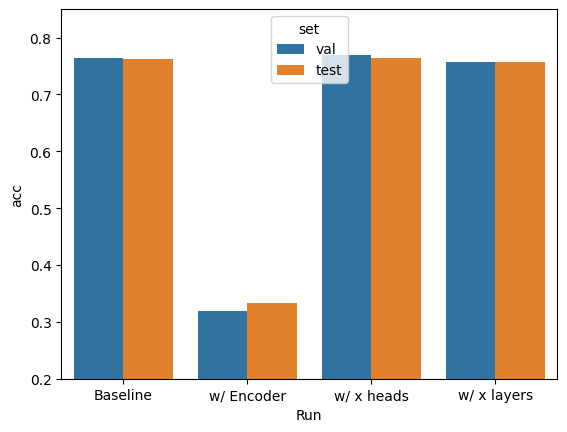

In [146]:
sns.barplot(report_df, x='Run', y='acc', hue='set').set_ylim(0.2, 0.85)

With the available computing resources and with this dataset, increasing the number of heads or the number of layers does not seem to significantly boost the performance.

The variant with the Transformer Encoder does not work well, as can be seen by the training loss, which does not really go down. We assume something is missing for the vanilla encoder to work well in our setup. 

<a name="section-interpretation"></a><h2 style="color:rgb(0,120,170)">Task E: Interpreting Attention Weights (3 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision
</div>

In [147]:
model = torch.load(f"best_model_attention_no_RNN.pt").to(device)

In [148]:
x_test = batches["test"]["x"]
x_test_arr = np.vstack(x_test[:-1])

In [149]:
y_pred_test = predict(model, batches["test"]["x"], device=device)
y_test = batches["test"]["y"]

In [150]:
y_test_arr = np.hstack(y_test[:-1])
y_pred_test_arr = y_pred_test[:len(y_test_arr)]

In [151]:
correct_classified_indices = np.where(y_pred_test_arr == y_test_arr)[0]

In [152]:
incorrect_classified_indices = np.where(y_pred_test_arr != y_test_arr)[0]

In [153]:
correct_idx1 = np.random.choice(correct_classified_indices)
correct_idx2 = np.random.choice(correct_classified_indices)

incorrect_idx1 = np.random.choice(incorrect_classified_indices)
incorrect_idx2 = np.random.choice(incorrect_classified_indices)

In [154]:
correct_x1 = x_test_arr[correct_idx1]
correct_x2 = x_test_arr[correct_idx2]

incorrect_x1 = x_test_arr[incorrect_idx1]
incorrect_x2 = x_test_arr[incorrect_idx2]

correct_x1.resize(1, 100)
correct_x2.resize(1, 100)

incorrect_x1.resize(1, 100)
incorrect_x2.resize(1, 100)

correct_x1 = torch.LongTensor(correct_x1).to(device)
correct_x2 = torch.LongTensor(correct_x2).to(device)
incorrect_x1 = torch.LongTensor(incorrect_x1).to(device)
incorrect_x2 = torch.LongTensor(incorrect_x2).to(device)

In [155]:
rnn_correct_x1 = model.lookup(correct_x1)
attention_scores_correct_x1, attention_weights_correct_x1 = model.attention(rnn_correct_x1, rnn_correct_x1)
test_df['text'][correct_idx1]

'An impressive outbreak has started in North Kivu province, affecting mainly Goma, Karisimbi, Nyirango and Binza. Based on this specific situation, the regional cholera platform has looked for additional information and found out that, 1,464 cumulated cases incl. 12 deaths were reported in a 4- week time (between W24 and W28) in the sole North Kivu Province.'

In [156]:
doc_len = min(config['MAX_DOCUMENT_LENGTH'], len(test_df['tokenized_text'][correct_idx1]))
w_df = pd.DataFrame({'words': test_df['tokenized_text'][correct_idx1][:doc_len], 'weights': attention_weights_correct_x1.detach().cpu().numpy()[0][:doc_len]})
w_df.sort_values('weights', ascending=False).head(20)

,words,weights
21,cholera,0.094277
1,outbreak,0.086786
36,cases,0.075356
42,deaths,0.059350
20,regional,0.053858
17,specific,0.049644
4,kivu,0.039794
62,kivu,0.039794
25,information,0.036745
7,affecting,0.032409


In [157]:
rnn_correct_x2 = model.lookup(correct_x2)
attention_scores_correct_x2, attention_weights_correct_x2 = model.attention(rnn_correct_x2, rnn_correct_x2)
test_df['text'][correct_idx2]

'Armed actors are becoming a persistent feature within IDP camps, especially in Jad’ah, Hammam Al-Alil and Haj Ali camps, despite repeated efforts by humanitarian actors and camp managers to assert the civilian character of camps. IDPs frequently report feeling threatened by the presence of armed actors and the risk of intimidation of vulnerable IDPs especially female headed households.Interventions by humanitarian partners to address this extremely concerning development are ongoing with relevant stakeholders. '

In [158]:
doc_len = min(config['MAX_DOCUMENT_LENGTH'], len(test_df['tokenized_text'][correct_idx2]))
w_df = pd.DataFrame({'words': test_df['tokenized_text'][correct_idx2][:doc_len], 'weights': attention_weights_correct_x2.detach().cpu().numpy()[0][:doc_len]})
w_df.sort_values('weights', ascending=False).head(20)

,words,weights
55,relevant,0.058806
35,feeling,0.049809
45,female,0.045012
2,becoming,0.038086
21,repeated,0.035423
15,al-alil,0.034569
14,hammam,0.031045
33,frequently,0.028360
56,stakeholders,0.028162
37,presence,0.027915


In [159]:
rnn_incorrect_x1 = model.lookup(incorrect_x1)
attention_scores_incorrect_x1, attention_weights_incorrect_x1 = model.attention(rnn_incorrect_x1, rnn_incorrect_x1)
test_df['text'][incorrect_idx1]

'Meanwhile, yesterday, an inter-agency United Nations/Syria Arab Red Crescent mission visited the towns of Saqba and Kafar Batna, in eastern Ghouta. This was the first United Nations access to eastern Ghouta since it delivered assistance to Duma on 15 March. During the visit, the mission visited medical facilities, schools and a local market. They observed the destruction of infrastructure, with over half of Saqba damaged or destroyed. Six schools in Saqba are functioning, and interventions are ongoing to rehabilitate additional educational facilities.'

In [160]:
doc_len = min(config['MAX_DOCUMENT_LENGTH'], len(test_df['tokenized_text'][incorrect_idx1]))
w_df = pd.DataFrame({'words': test_df['tokenized_text'][incorrect_idx1][:doc_len], 'weights': attention_weights_incorrect_x1.detach().cpu().numpy()[0][:doc_len]})
w_df.sort_values('weights', ascending=False).head(20)

,words,weights
64,educational,0.117071
56,schools,0.087641
42,schools,0.087641
39,medical,0.049405
7,arab,0.038733
44,market,0.038661
28,assistance,0.035640
4,inter-agency,0.033841
65,facilities,0.032313
40,facilities,0.032313


In [161]:
rnn_incorrect_x2 = model.lookup(incorrect_x2)
attention_scores_incorrect_x2, attention_weights_incorrect_x2 = model.attention(rnn_incorrect_x2, rnn_incorrect_x2)
test_df['text'][incorrect_idx2]

'A secondary student was killed by flash floods that also cut off the Narok-Mai Mahiu road on Tuesday night.Motorists and passengers were forced to spend the night in the cold after heavy rains swept away a section of the busy highway. The student from Governors Secondary School in Mai Mahiu was killed near the Karima trading centre.“Nearly all roads are impassable. We are asking for quick intervention so that normal operations can resume,” Waithera said.“We saw some cattle being swept away while occupants of a small car were rescued. We don’t know how long it will take us here,” passenger Peter Tobiko said. '

In [162]:
doc_len = min(config['MAX_DOCUMENT_LENGTH'], len(test_df['tokenized_text'][incorrect_idx2]))
w_df = pd.DataFrame({'words': test_df['tokenized_text'][incorrect_idx2][:doc_len], 'weights': attention_weights_incorrect_x2.detach().cpu().numpy()[0][:doc_len]})
w_df.sort_values('weights', ascending=False).head(20)

,words,weights
26,governors,0.097863
38,roads,0.067484
28,school,0.058168
53,cattle,0.053433
23,highway,0.032212
9,road,0.032107
39,impassable,0.031085
62,know,0.025511
1,student,0.024418
25,student,0.024418


In most of the cases, the weights assigned to the different words make sense. 